In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Molon-Lave'
raceDate = '31/03/2021'
surface = 'Gravel'
competition = 'Greek Cup'

link = 'https://www.ewrc-results.com/results/88517-rally-sprint-molon-lave-2024/?s='
startat, no_ss=455879, int(3)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

/home/ilias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Papadimitriou,C1,9:09.65,-,77.5,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,1
1,2,#3,Paradissis P.,C2,9:30.66,+21.01 + 21.01,74.6 1.78,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,2
2,3,#7,Vigopoulos Nik,C2,9:34.15,+24.50 + 3.49,74.2 2.07,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,3
3,4,#10,Tzemos K. - A,C2,9:48.64,+38.99 + 14.49,72.3 3.30,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,4
4,5,#12,Tsetsonis Elia,C2,9:52.25,+42.60 + 3.61,71.9 3.60,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40,#123,Palapanoglou I,2,12:28.16,+3:30.91 + 0.80,56.9 17.8,3,Molon-Lave,31/03/2021,Gravel,Greek Cup,40
40,41,#115,Papandreou A.,3,12:46.76,+3:49.51 + 18.60,55.5 19.4,3,Molon-Lave,31/03/2021,Gravel,Greek Cup,41
41,42,#122,Votzakis Pavlo,2,12:59.45,+4:02.20 + 12.69,54.6 20.5,3,Molon-Lave,31/03/2021,Gravel,Greek Cup,42
42,43,#116,Kansos Patrokl,4,13:43.22,+4:45.97 + 43.77,51.7 24.2,3,Molon-Lave,31/03/2021,Gravel,Greek Cup,43


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [9]:
pd.set_option("display.max_columns", None)

#dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))
dfi.export(rally2023_TimeView,'testtt.png')

CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--crash-dumps-dir=/home/ilias/.dataframe_image/tmp78m7pg0t', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/home/ilias/.dataframe_image/tmp78m7pg0t/temp.png', '/home/ilias/.dataframe_image/tmp78m7pg0t/temp.html']' returned non-zero exit status 64.

In [11]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Papadimitriou,C1,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,1,549.65
1,Paradissis P.,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,2,570.66
2,Vigopoulos Nik,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,3,574.15
3,Tzemos K. - A,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,4,588.64
4,Tsetsonis Elia,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,5,592.25
...,...,...,...,...,...,...,...,...,...
47,Zouras E. - P,C4,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,48,730.73
48,Papandreou A.,3,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,49,733.05
49,Christou Dimit,2,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,50,737.03
50,Tzilavis Savva,2,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,51,759.12


In [12]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)https://www.ewrc-results.com/results/88517-rally-sprint-molon-lave-2024/?s=455879https://www.ewrc-results.com/results/88517-rally-sprint-molon-lave-2024/?s=455879
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race       ss Gr/Cl             
Molon-Lave 1  2           641.86
              3           602.15
              4           625.49
              C1          549.65
              C2          570.66
              C3          652.30
              C4          648.59
              C5          647.94
              C6          655.81
              RGT         618.72
              T1          638.82
           2  2           645.77
              3           605.54
              4           619.53
              C1          537.82
              C2          569.58
              C3          643.76
              C4          644.43
              C5          633.42
              C6          644.17
              RGT         606.09
              T1          636.42

In [13]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Papadimitriou,C1,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,1,549.65,549.65,549.65,0.00,0.00,0.000000,01
1,Paradissis P.,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,2,570.66,570.66,549.65,21.01,0.00,0.000000,01
2,Vigopoulos Nik,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,3,574.15,570.66,549.65,24.50,3.49,0.611573,01
3,Tzemos K. - A,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,4,588.64,570.66,549.65,38.99,17.98,3.150738,01
4,Tsetsonis Elia,C2,1,Molon-Lave,31/03/2021,Gravel,Greek Cup,5,592.25,570.66,549.65,42.60,21.59,3.783339,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Melas D. - Va,2,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,23,648.84,645.77,537.82,111.02,3.07,0.475401,02
103,Palapanoglou I,2,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,43,707.33,645.77,537.82,169.51,61.56,9.532806,02
104,Votzakis Pavlo,2,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,46,714.70,645.77,537.82,176.88,68.93,10.674079,02
105,Christou Dimit,2,2,Molon-Lave,31/03/2021,Gravel,Greek Cup,50,737.03,645.77,537.82,199.21,91.26,14.131966,02


In [16]:
Group = 'C1'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2.csv')

In [17]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02
Crew,,
Anastassopoulo,7.98,NaN
Athanassopoulo,39.71,41.35
Basdelis Andre,2.98,20.46
Basdelis Giorg,4.96,7.20
Bris Panagioti,35.07,32.45
Davaris Nikos,77.89,73.21
Edipidis Ioann,0.00,0.00
Flandy - Gira,32.43,26.83
Giannakopoulos,1.81,66.18


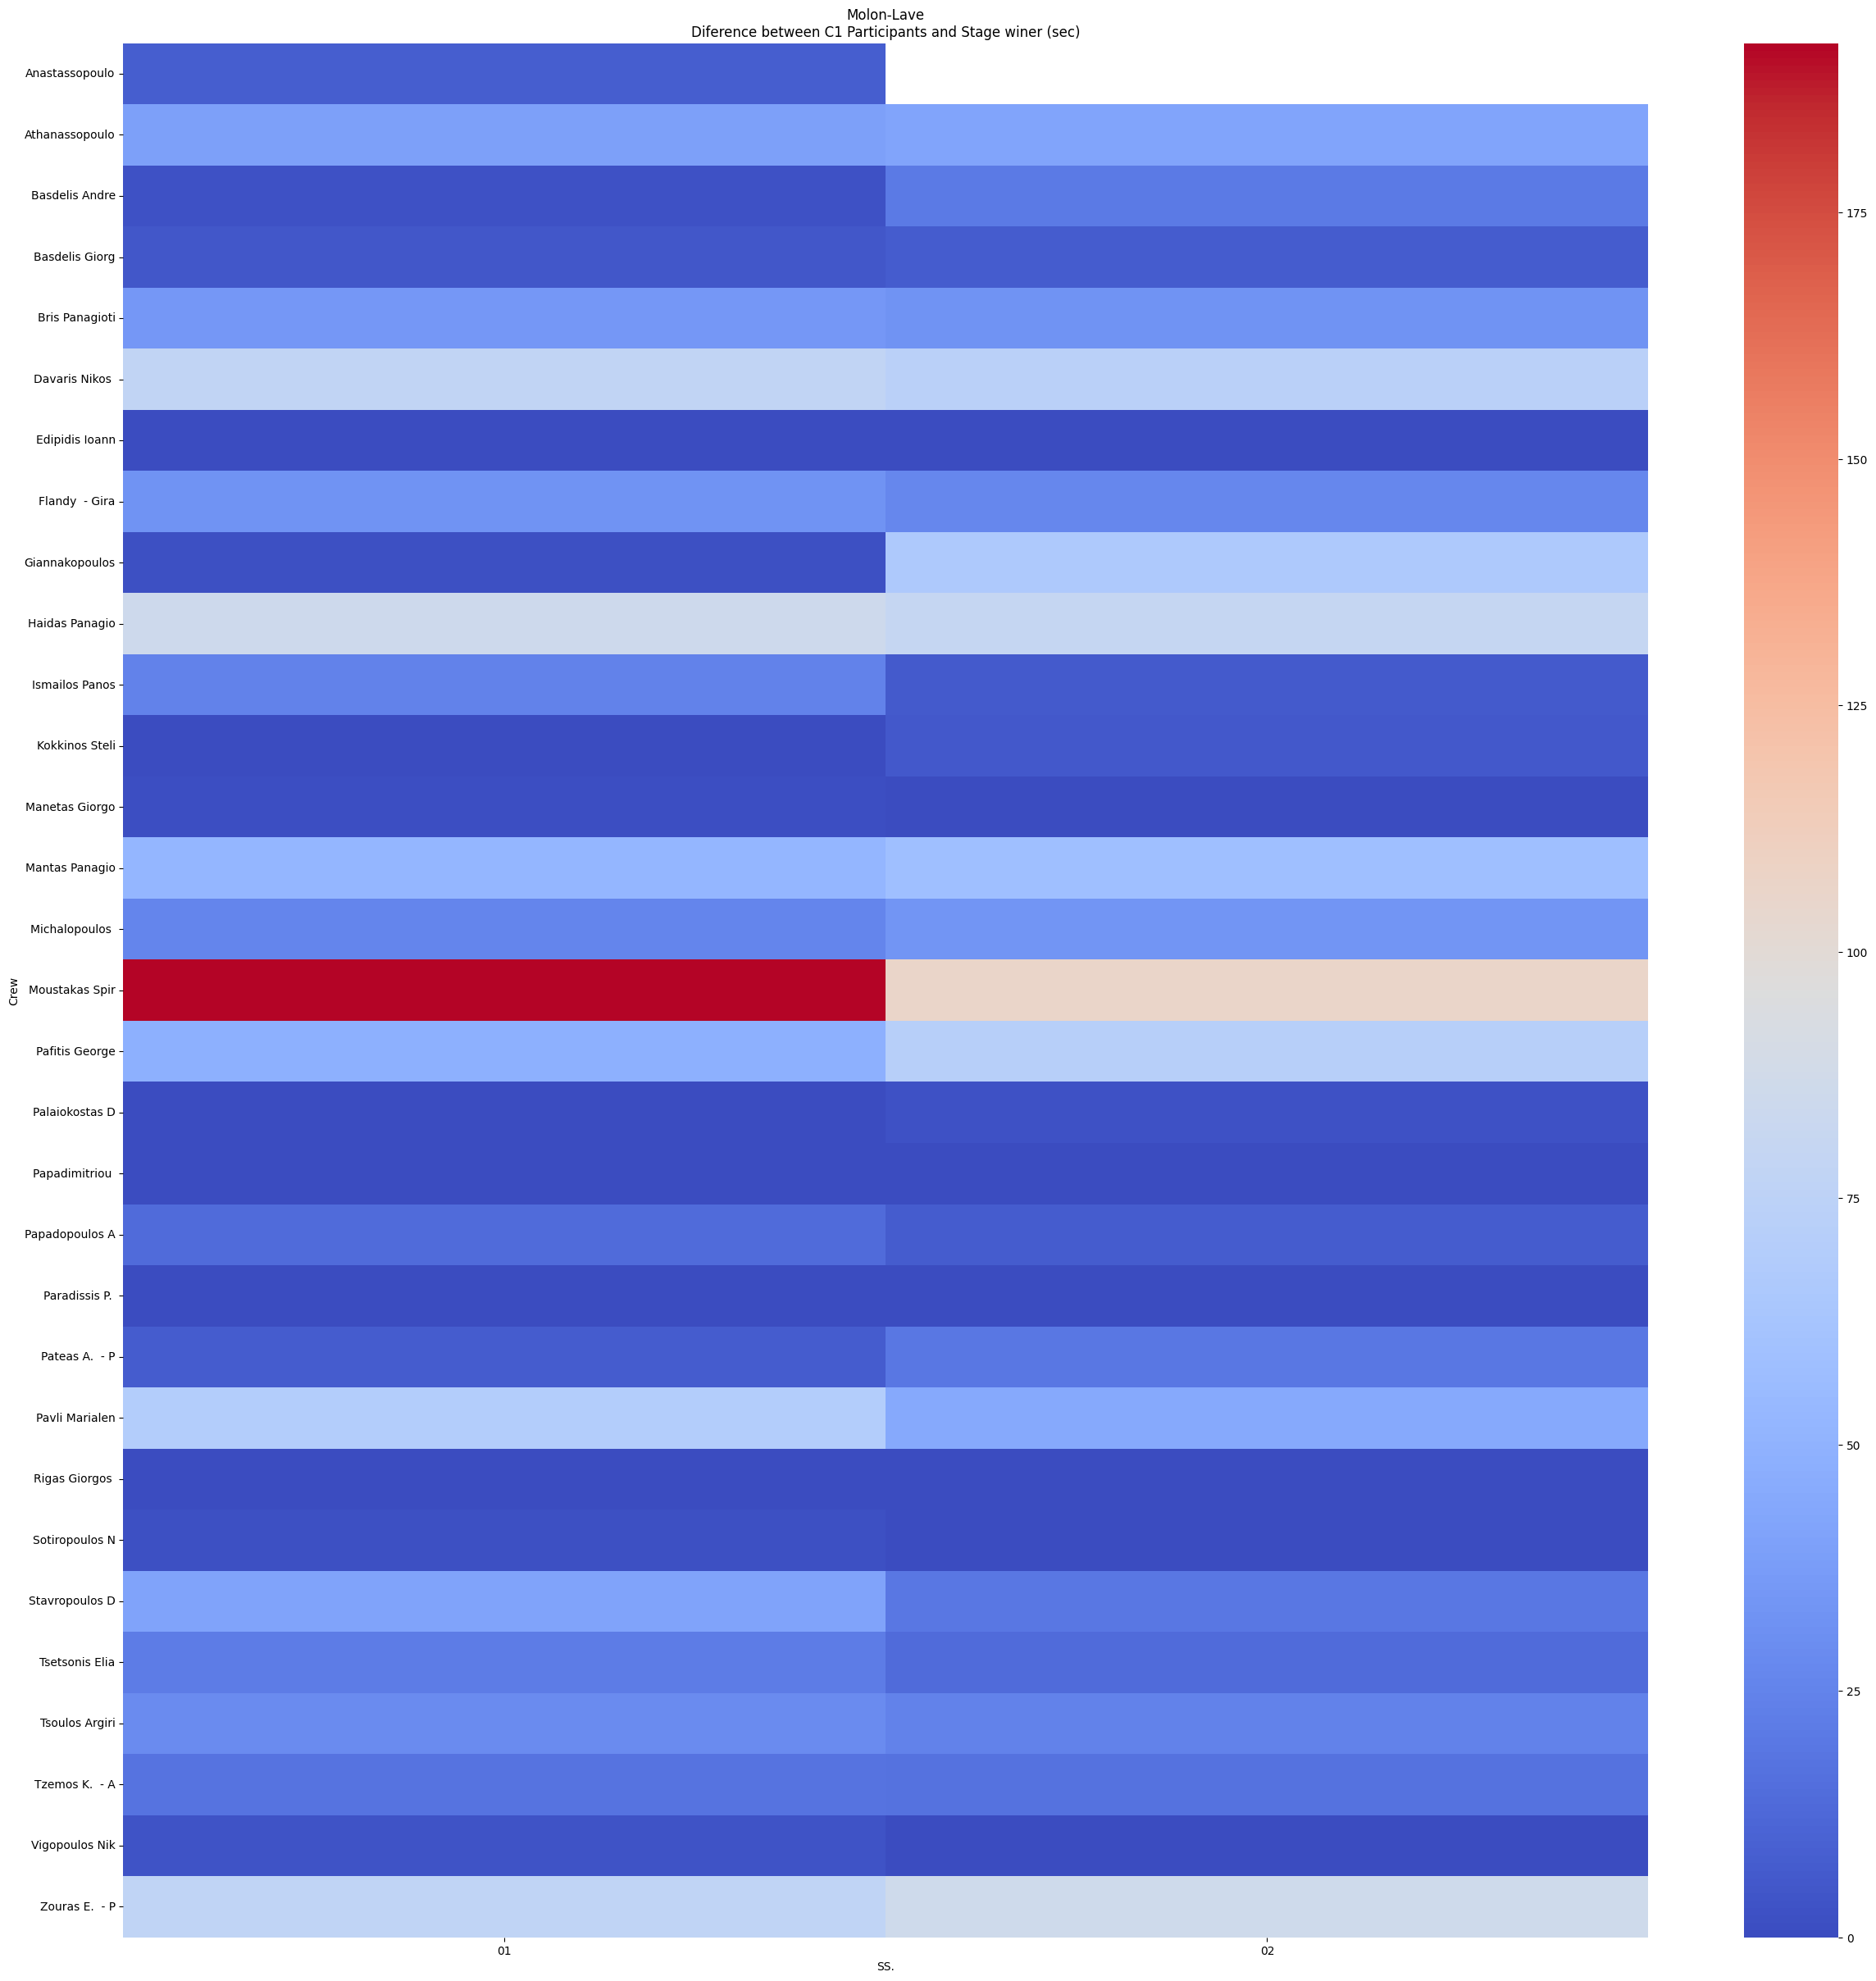

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

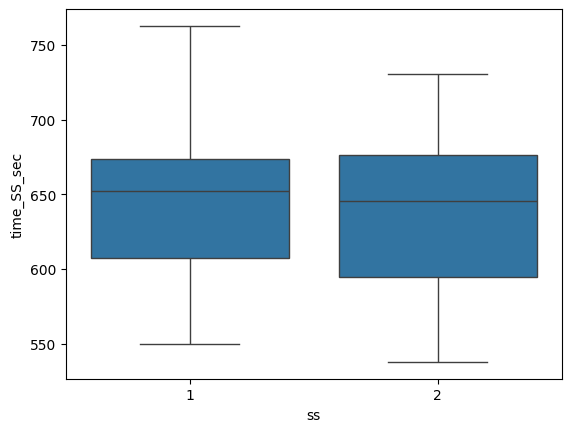

In [19]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")

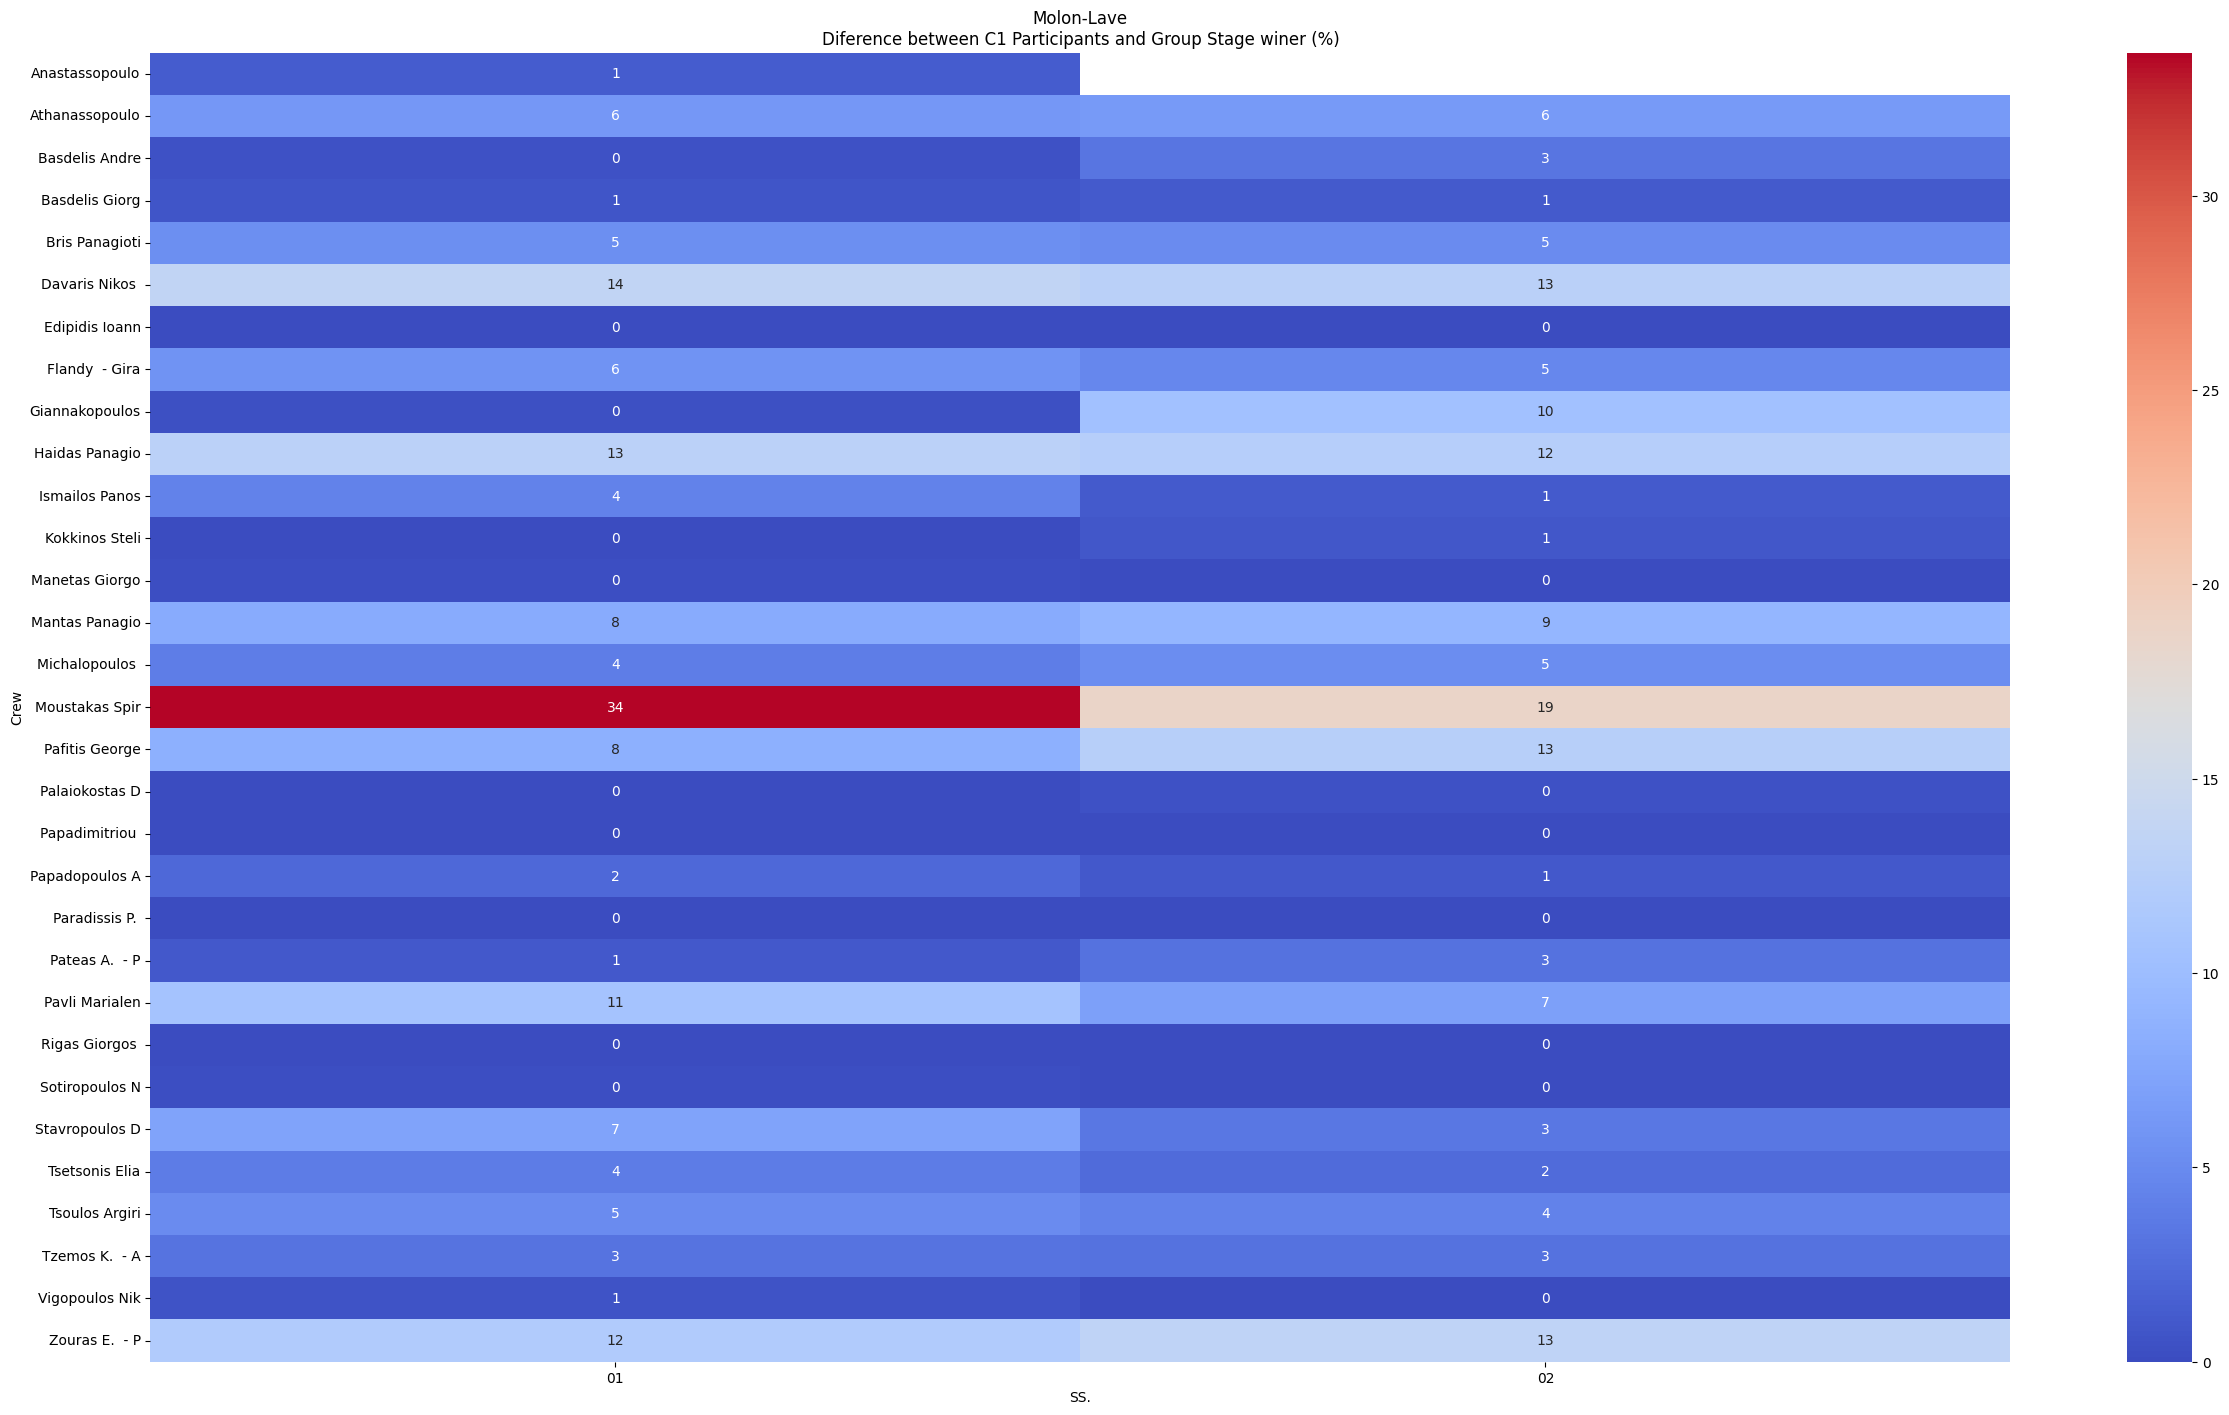

In [20]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
#plt.savefig(rallyname + Group + ".jpg")
plt.show()